In [1]:
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.shape[0]

60000

input data에 존재하는 이미지의 shape 변경 <br> (28x28) => (28x28x1)<br>

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')/255 # 0 ~ 1 사이의 값으로 normalization
x_test = x_test.astype('float32')/255

In [ ]:
y_train[0]

5

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [ ]:
print(y_train[0])
y_train_one_hot[0]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# 2D 필터의 움직임이 2D(가로 세로)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# strides=(1, 1)

Conv2D :  https://keras.io/layers/convolutional/  
          https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
<br> 참고

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# strides의 기본값 => pool_size

2x2 크기의 filter를 사용해서 Max pooling 수행

In [ ]:
model.add(Flatten())

Flatten(): 3차원 형태의 데이터를 1차원 형태로 변경

In [ ]:
model.add(Dense(128, activation='relu'))

In [ ]:
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 22s 58ms/step - loss: 2.8711 - accuracy: 0.9087 - val_loss: 0.0959 - val_accuracy: 0.9732
Epoch 2/10
375/375 [==============================] - 20s 52ms/step - loss: 0.0710 - accuracy: 0.9800 - val_loss: 0.0881 - val_accuracy: 0.9760
Epoch 3/10
375/375 [==============================] - 22s 58ms/step - loss: 0.0357 - accuracy: 0.9896 - val_loss: 0.1016 - val_accuracy: 0.9784
Epoch 4/10
375/375 [==============================] - 22s 58ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.1239 - val_accuracy: 0.9728
Epoch 5/10
375/375 [==============================] - 21s 56ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.1049 - val_accuracy: 0.9816
Epoch 6/10
375/375 [==============================] - 20s 54ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.1153 - val_accuracy: 0.9824
Epoch 7/10
375/375 [==============================] - 21s 55ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.1154 - val_accuracy:

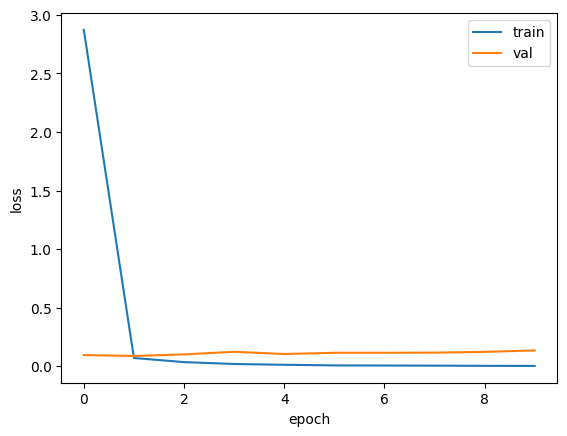

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

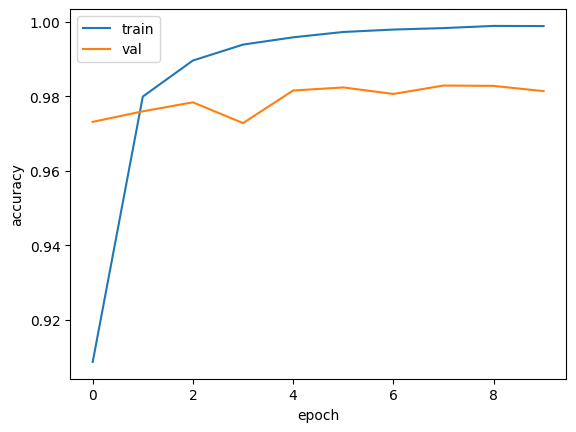

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.1287 - accuracy: 0.9815
test_acc: 0.9815000295639038


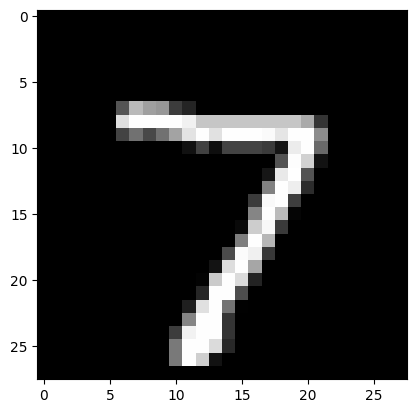

In [ ]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
prediction = model.predict(x_test[0:1]) # 첫번째 이미지 in the test dataset

1/1 [==============================] - 0s 93ms/step


In [ ]:
prediction

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test[0]

7

In [ ]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
print(labels[np.argmax(prediction)])

7
